#City Traffic and Accident  Analysis:

##Objectives:

1.Data Exploration

2.Apply a machine learning model

(this does not contain data for New York)

##Step 1:

##Data Preparation and Cleaning:

Our first objective is to absolve our data set of missing values and inconsistencies


We will import pandas(a library that allows us to work with column data)

In [50]:
import pandas as pd

In [51]:
data = pd.read_csv("US_Accidents_March23.csv", low_memory=False)

In [53]:
data

ID   Source  Severity           Start_Time             End_Time  \
0            A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1            A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2            A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3            A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4            A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
...          ...      ...       ...                  ...                  ...   
280552  A-280560  Source2         2  2016-11-18 14:07:54  2016-11-18 15:37:44   
280553  A-280561  Source2         2  2016-11-18 13:59:27  2016-11-18 15:15:00   
280554  A-280562  Source2         3  2016-11-18 14:11:18  2016-11-18 15:40:13   
280555  A-280563  Source2         3  2016-11-18 14:12:54  2016-11-18 15:45:00   
280556  A-280564  Source2         2  2016-11-18 14:19:37  2016-11-18 15:48:42   

        Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0       39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1       39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2       39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3       39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4       39.627781 -84.188354      NaN      NaN          0.01  ...      False   
...           ...        ...      ...      ...           ...  ...        ...   
280552  29.850574 -95.488892      NaN      NaN          0.01  ...      False   
280553  29.686520 -95.334122      NaN      NaN          0.00  ...      False   
280554  29.435871 -98.494118      NaN      NaN          0.01  ...      False   
280555  32.796425 -96.815544      NaN      NaN          0.01  ...      False   
280556  29.733156 -95.372444      NaN      NaN           NaN  ...        NaN   

       Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0        False  False           False          False        False   
1        False  False           False          False        False   
2        False  False           False           True        False   
3        False  False           False          False        False   
4        False  False           False           True        False   
...        ...    ...             ...            ...          ...   
280552   False  False           False           True        False   
280553   False  False           False          False        False   
280554   False  False           False           True        False   
280555   False  False           False          False        False   
280556     NaN    NaN             NaN            NaN          NaN   

       Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0               Night          Night             Night                 Night  
1               Night          Night             Night                   Day  
2               Night          Night               Day                   Day  
3               Night            Day               Day                   Day  
4                 Day            Day               Day                   Day  
...               ...            ...               ...                   ...  
280552            Day            Day               Day                   Day  
280553            Day            Day               Day                   Day  
280554            Day            Day               Day                   Day  
280555            Day            Day               Day                   Day  
280556            NaN            NaN               NaN                   NaN  

[280557 rows x 46 columns]

When under going exploration it is a good idea to get some general information on our columns,though this was provided on Kaggle most data sets  work with wont have this information provided.

In [54]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
len(data)

280557

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280557 entries, 0 to 280556
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     280557 non-null  object 
 1   Source                 280557 non-null  object 
 2   Severity               280557 non-null  int64  
 3   Start_Time             280557 non-null  object 
 4   End_Time               280557 non-null  object 
 5   Start_Lat              280557 non-null  float64
 6   Start_Lng              280557 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           280556 non-null  float64
 10  Description            280556 non-null  object 
 11  Street                 280556 non-null  object 
 12  City                   280540 non-null  object 
 13  County                 280556 non-null  object 
 14  State                  280556 non-nu

To get a summary of the data's statistics we can use:describe

In [9]:
data.describe()

Severity      Start_Lat      Start_Lng  End_Lat  End_Lng  \
count  280557.000000  280557.000000  280557.000000      0.0      0.0   
mean        2.382482      36.157214     -97.690439      NaN      NaN   
std         0.488744       4.642135      19.036568      NaN      NaN   
min         1.000000      25.433098    -123.813927      NaN      NaN   
25%         2.000000      33.762241    -118.173264      NaN      NaN   
50%         2.000000      37.294685     -95.291931      NaN      NaN   
75%         3.000000      40.129658     -81.286583      NaN      NaN   
max         4.000000      44.895218     -70.571518      NaN      NaN   

        Distance(mi)  Temperature(F)  Wind_Chill(F)    Humidity(%)  \
count  280556.000000   276404.000000   35588.000000  275953.000000   
mean        0.051814       64.146729      30.502133      65.202422   
std         0.701584       16.851868      16.860047      21.341412   
min         0.000000      -77.800000     -29.300000       4.000000   
25%         0.000000       54.000000      22.200000      50.000000   
50%         0.010000       66.000000      31.400000      67.000000   
75%         0.010000       77.000000      38.200000      82.000000   
max        80.890000      143.600000     111.000000     100.000000   

        Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  277241.000000   274099.000000    225648.000000       27451.000000  
mean       30.020440        9.211032         8.540957           0.065719  
std         0.261017        2.136923         5.871805           0.552620  
min         0.120000        0.000000         0.000000           0.000000  
25%        29.910000       10.000000         5.000000           0.000000  
50%        30.020000       10.000000         8.100000           0.010000  
75%        30.130000       10.000000        10.400000           0.030000  
max        33.040000      105.000000       822.800000          10.140000

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include=numerics)
len(numeric_data.columns)

13

Seeing how much of our data is numeric also gives us an idea of how much of our data is  not numeric and how much non-numeric data we shall have to process

Next if possible we want to absolve our data set of any missing values:

In [11]:
data.isna()

ID  Source  Severity  Start_Time  End_Time  Start_Lat  Start_Lng  \
0       False   False     False       False     False      False      False   
1       False   False     False       False     False      False      False   
2       False   False     False       False     False      False      False   
3       False   False     False       False     False      False      False   
4       False   False     False       False     False      False      False   
...       ...     ...       ...         ...       ...        ...        ...   
280552  False   False     False       False     False      False      False   
280553  False   False     False       False     False      False      False   
280554  False   False     False       False     False      False      False   
280555  False   False     False       False     False      False      False   
280556  False   False     False       False     False      False      False   

        End_Lat  End_Lng  Distance(mi)  ...  Roundabout  Station   Stop  \
0          True     True         False  ...       False    False  False   
1          True     True         False  ...       False    False  False   
2          True     True         False  ...       False    False  False   
3          True     True         False  ...       False    False  False   
4          True     True         False  ...       False    False  False   
...         ...      ...           ...  ...         ...      ...    ...   
280552     True     True         False  ...       False    False  False   
280553     True     True         False  ...       False    False  False   
280554     True     True         False  ...       False    False  False   
280555     True     True         False  ...       False    False  False   
280556     True     True          True  ...        True     True   True   

        Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0                 False           False         False           False   
1                 False           False         False           False   
2                 False           False         False           False   
3                 False           False         False           False   
4                 False           False         False           False   
...                 ...             ...           ...             ...   
280552            False           False         False           False   
280553            False           False         False           False   
280554            False           False         False           False   
280555            False           False         False           False   
280556             True            True          True            True   

        Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  
0                False              False                  False  
1                False              False                  False  
2                False              False                  False  
3                False              False                  False  
4                False              False                  False  
...                ...                ...                    ...  
280552           False              False                  False  
280553           False              False                  False  
280554           False              False                  False  
280555           False              False                  False  
280556            True               True                   True  

[280557 rows x 46 columns]

In [13]:
missing_percentages = (data.isna().sum().sort_values(ascending=False))/len(data)
missing_percentages

End_Lng                  1.000000
End_Lat                  1.000000
Precipitation(in)        0.902155
Wind_Chill(F)            0.873152
Wind_Speed(mph)          0.195714
Visibility(mi)           0.023018
Weather_Condition        0.020926
Humidity(%)              0.016410
Temperature(F)           0.014803
Pressure(in)             0.011819
Wind_Direction           0.008291
Weather_Timestamp        0.008241
Timezone                 0.000110
Zipcode                  0.000110
Airport_Code             0.000110
Nautical_Twilight        0.000061
Civil_Twilight           0.000061
City                     0.000061
Astronomical_Twilight    0.000061
Sunrise_Sunset           0.000061
Country                  0.000004
Amenity                  0.000004
Street                   0.000004
Description              0.000004
Distance(mi)             0.000004
State                    0.000004
Bump                     0.000004
Crossing                 0.000004
Give_Way                 0.000004
County        

Lets represent this as a graph:

In [14]:
type(missing_percentages)#each column has a single bar

pandas.core.series.Series

we want to filter out all columns with zero values:

In [33]:
missing_percentages != 0

End_Lng                   True
End_Lat                   True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
Visibility(mi)            True
Weather_Condition         True
Humidity(%)               True
Temperature(F)            True
Pressure(in)              True
Wind_Direction            True
Weather_Timestamp         True
Timezone                  True
Zipcode                   True
Airport_Code              True
Nautical_Twilight         True
Civil_Twilight            True
City                      True
Astronomical_Twilight     True
Sunrise_Sunset            True
Country                   True
Amenity                   True
Street                    True
Description               True
Distance(mi)              True
State                     True
Bump                      True
Crossing                  True
Give_Way                  True
County                    True
Station                   True
Roundabout                True
Railway 

To keep column values with non zero values use the code above as an index:

<Axes: >

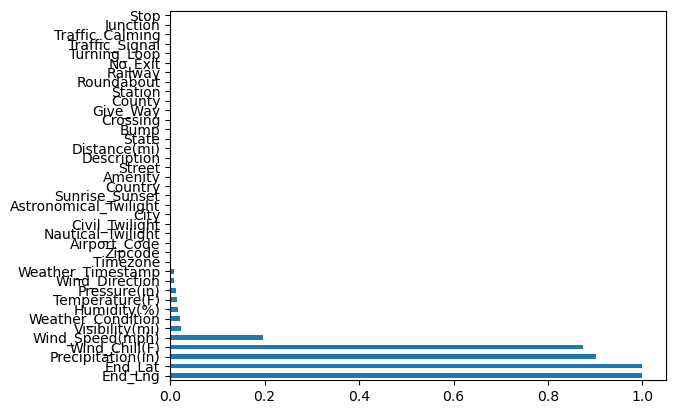

In [36]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [37]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Step 2:Exploratory Analysis and Visualization:
Columns we will analyze:
1.City
2.Start time
3.Start lat, Start lng
4.Temperature
5.Weather condition

In [41]:
cities = data.City.unique()
len(cities)

3896

In [43]:
cities_by_accident = data.City.value_counts()
cities_by_accident

City
Los Angeles      12727
Houston           7550
Atlanta           5894
Sacramento        5223
Omaha             4925
                 ...  
Wilmer               1
Colleyville          1
Schulenburg          1
Abbott               1
Meadows Place        1
Name: count, Length: 3895, dtype: int64

In [44]:
cities_by_accident[:20]#top 20

City
Los Angeles     12727
Houston          7550
Atlanta          5894
Sacramento       5223
Omaha            4925
Orlando          4892
Austin           4299
Dallas           4269
Dayton           4090
San Diego        4074
Miami            3768
Grand Rapids     3174
San Jose         3026
Flint            2679
Tampa            2095
Columbus         1918
Lancaster        1882
Oakland          1816
Detroit          1771
Long Beach       1751
Name: count, dtype: int64

<Axes: ylabel='City'>

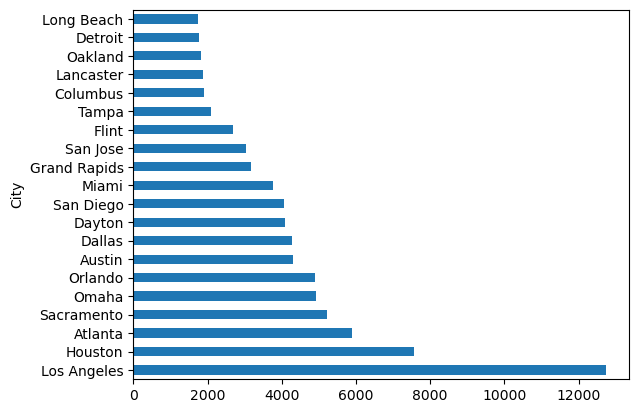

In [46]:
cities_by_accident[:20].plot(kind='barh')

We want to compare accidents and cities, we want to know which cities have the most accidents

In [23]:
import seaborn as sns
sns.set_style("darkgrid")

/tmp/ipykernel_255/3405282844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

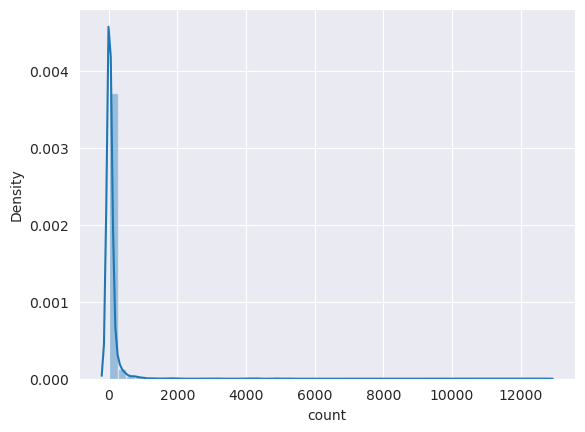

In [51]:
sns.distplot(cities_by_accident)

It seems most cities don't have a lot of accidents(relatively)
we now want to create two buckets,one containing high accident cities and another containing low accident cities

In [54]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

lets look at the number of high accident cities:

In [62]:
len(high_accident_cities)

31

In [65]:
len(high_accident_cities)/len(cities)

0.00795687885010267

/tmp/ipykernel_255/2843252471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

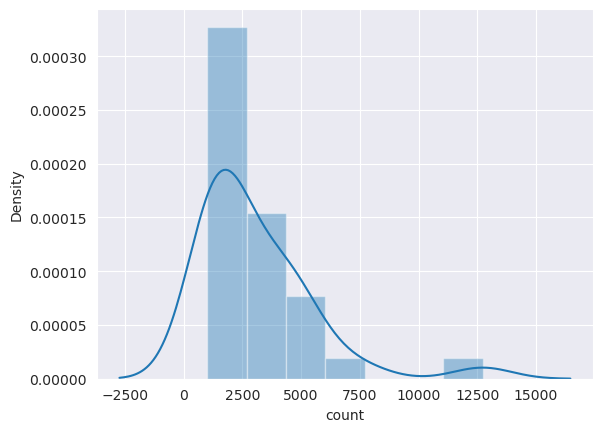

In [56]:
sns.distplot(high_accident_cities)

/tmp/ipykernel_255/469555131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

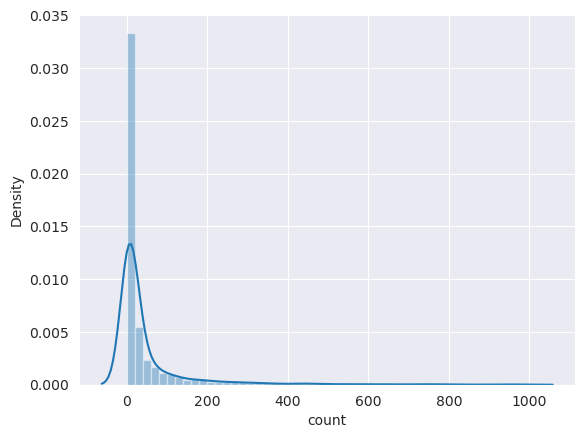

In [57]:
sns.distplot(low_accident_cities)

To analyse the lower bucket better lets apply a logarithmic scale:

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

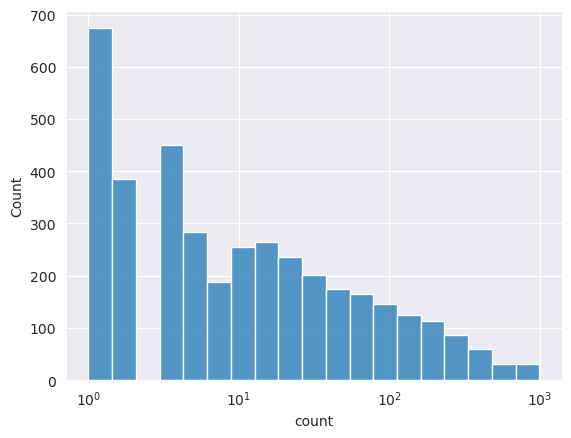

In [59]:
sns.histplot(low_accident_cities, log_scale=True)

The plot reveals the number of accidents that occured in a number of cities

In [64]:
cities_by_accident[cities_by_accident == 1]

City
Springtown       1
Tiro             1
Diablo           1
Foster City      1
Berry Creek      1
                ..
Wilmer           1
Colleyville      1
Schulenburg      1
Abbott           1
Meadows Place    1
Name: count, Length: 674, dtype: int64

Lets Analyze Start Time:

In [66]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [21]:
data.Start_Time

0        2016-02-08 05:46:00
1        2016-02-08 06:07:59
2        2016-02-08 06:49:27
3        2016-02-08 07:23:34
4        2016-02-08 07:39:07
                 ...        
280552   2016-11-18 14:07:54
280553   2016-11-18 13:59:27
280554   2016-11-18 14:11:18
280555   2016-11-18 14:12:54
280556   2016-11-18 14:19:37
Name: Start_Time, Length: 280557, dtype: datetime64[ns]

lets convert it into date data type

In [20]:
pd.to_datetime(data.Start_Time)

0        2016-02-08 05:46:00
1        2016-02-08 06:07:59
2        2016-02-08 06:49:27
3        2016-02-08 07:23:34
4        2016-02-08 07:39:07
                 ...        
280552   2016-11-18 14:07:54
280553   2016-11-18 13:59:27
280554   2016-11-18 14:11:18
280555   2016-11-18 14:12:54
280556   2016-11-18 14:19:37
Name: Start_Time, Length: 280557, dtype: datetime64[ns]

we shall put this in place of the old column

In [18]:
data.Start_Time = pd.to_datetime(data.Start_Time)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

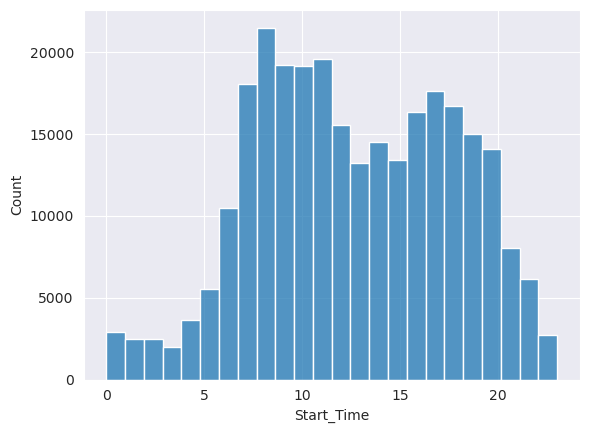

In [24]:
sns.histplot(data.Start_Time.dt.hour, bins=24)

The plot above reveal the accident that occured at specific hours of the day
A lot of accidents occured between 6am and 10am,the aciidents may be as a result of a lot of people commuting to work and/or in a hurry to get to work
the next highest is between 3pm and 6pm(people coming back from work)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

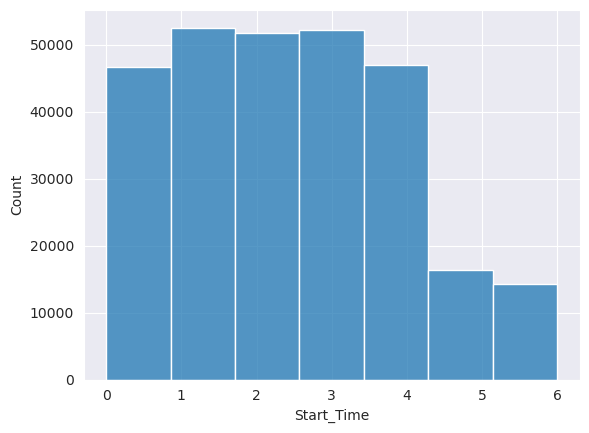

In [74]:
sns.histplot(data.Start_Time.dt.dayofweek, bins=7)

On weekend the number of accidents is lower than on weekdays,but on weekdays the number of accidents almost plateus
Now we want to see if the number of accidents by the hour is the same on weekends as on weekdays:

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

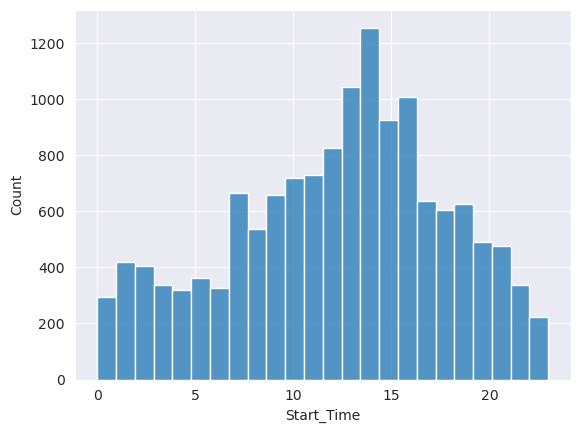

In [26]:
sundays_Start_Time = data.Start_Time[data.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_Start_Time.dt.hour, bins=24)

It appears as tho on Sundays the distribution is more spread out,we can also note that most accidents happen in the afternoon.(gaussian curve)
Lets compare this to Monday:

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

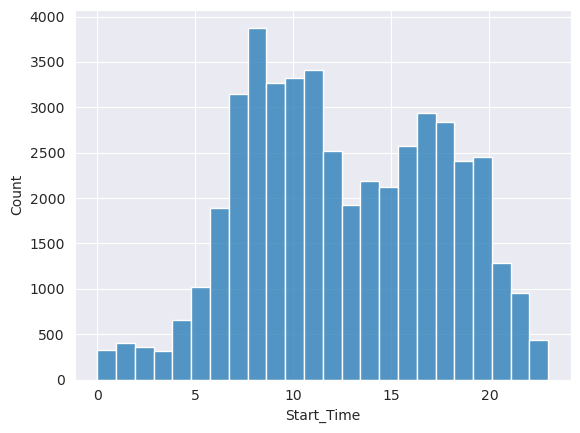

In [27]:
mondays_Start_Time = data.Start_Time[data.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_Start_Time.dt.hour, bins=24)

On Mondays the numbers of accidents peak between seven am and 11 am and again between four pm and 8 pm(might be two guassian curves )

Now lets analyze the months:

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

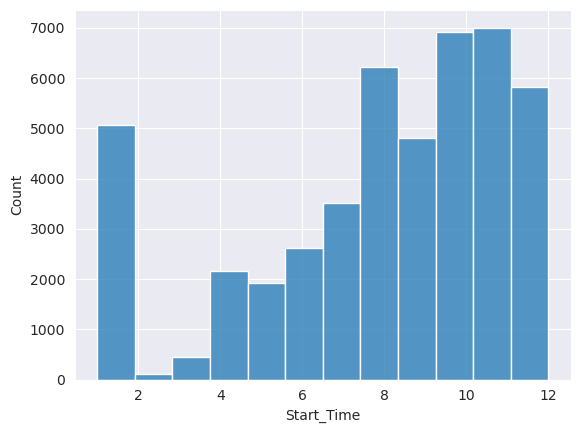

In [28]:
sns.histplot(mondays_Start_Time.dt.month, bins=12)

The number of accident peak at the beginning and at the end of the year,this most likely is as a result of people traveling for the holidays

It is also always good to check your sources:

In [48]:
data.Source

0         Source2
1         Source2
2         Source2
3         Source2
4         Source2
           ...   
280552    Source2
280553    Source2
280554    Source2
280555    Source2
280556    Source2
Name: Source, Length: 280557, dtype: object

when working with real world data such as this rows may be missing altogther(data not reported,issues intergrating data from multiple systems,human error)

In [49]:
data.Source.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

The majority of our data is coming from source 1,we might consider excluding source 3 its small and we may be unable to make any significant inferences from it

##Start Latitude and Longitude:

In [50]:
data.Start_Lat

0         39.865147
1         39.928059
2         39.063148
3         39.747753
4         39.627781
            ...    
280552    29.850574
280553    29.686520
280554    29.435871
280555    32.796425
280556    29.733156
Name: Start_Lat, Length: 280557, dtype: float64

In [51]:
data.Start_Lng

0        -84.058723
1        -82.831184
2        -84.032608
3        -84.205582
4        -84.188354
            ...    
280552   -95.488892
280553   -95.334122
280554   -98.494118
280555   -96.815544
280556   -95.372444
Name: Start_Lng, Length: 280557, dtype: float64

Lets represent these two metrics on a scatter plot:

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

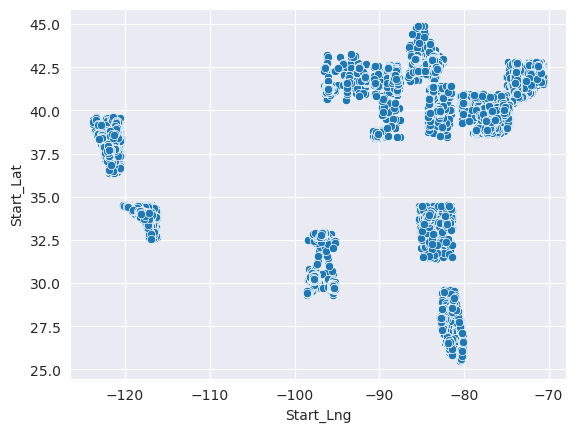

In [54]:
sns.scatterplot(x=data.Start_Lng, y=data.Start_Lat)

lets represent this on a map:

In [48]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [49]:
import folium #folium is a library that allows us to interact with web maps

In [56]:
lat, lon = data.Start_Lat[0], data.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [60]:
for x in data[['Start_Lat', 'Start_Lng']].sample(100).iterrows():
    print(x[1])

Start_Lat     36.878372
Start_Lng   -121.750725
Name: 25246, dtype: float64
Start_Lat    39.903103
Start_Lng   -74.967430
Name: 258683, dtype: float64
Start_Lat    27.821114
Start_Lng   -82.671326
Name: 135697, dtype: float64
Start_Lat    30.820786
Start_Lng   -98.238770
Name: 267509, dtype: float64
Start_Lat    33.839195
Start_Lng   -84.380112
Name: 147423, dtype: float64
Start_Lat    29.813395
Start_Lng   -95.496315
Name: 270568, dtype: float64
Start_Lat    33.352966
Start_Lng   -84.124855
Name: 151886, dtype: float64
Start_Lat     34.120899
Start_Lng   -117.890678
Name: 111085, dtype: float64
Start_Lat     37.318462
Start_Lng   -121.990021
Name: 8373, dtype: float64
Start_Lat     38.426384
Start_Lng   -122.832062
Name: 7732, dtype: float64
Start_Lat     33.997387
Start_Lng   -117.967697
Name: 92249, dtype: float64
Start_Lat     34.221371
Start_Lng   -118.473106
Name: 104524, dtype: float64
Start_Lat     34.219017
Start_Lng   -119.069740
Name: 82808, dtype: float64
Start_Lat    40.83

In [74]:
coordinates = lat, lon
maps = folium.Map()
marker = folium.Marker((lat, lon))
marker.add_to(maps)
maps

Lets us now create a heatmap to represent the list of coordinates

In [85]:
zip(list(data.Start_Lat),list(data.Start_Lng)) #combines the two different lists into one

In [77]:
!pip install folium --upgrade

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [82]:

from folium.plugins import HeatMap

In [86]:
maps = folium.Map()
HeatMap(zip(list(data.Start_Lat),list(data.Start_Lng))).add_to(maps)
maps

##Ask and Answer Questions:Section dedicated to questions derived from analysis
1.Are there more accidents in colder or warmer areas?

2.Which  5 state(s) have the highest number of accidents?How about per capita?

3.How many accidents occurred as a result of extreme weather conditions?

4.What time of the day are accidents most frequent

5.Which days of the week have the most accidents

6.Which months have the most accidents

7.What is the trend of accidents year over year(increasing/decreasing)

8.when are accidents per unit of traffic the highest

9.What time of day are accidents the most frequent

10.Is the distribution of accidents by hour the same on weekends as on weekdays

##Summary and conclusions:

###Insights:

1.No data from New York

2.The number of accidents per city decreases exponentially

3.0.7% of the the cities were accidents occur are high accident zones(based on the metric >=1000)

4.674 cities have reported one accident(need to investigate)

